# Maze exercise

In [8]:
import heapq
#extr maze from file and identify the start and final positions.
def parse_maze(file_path):
    maze = []
    start = goal = None
    with open(file_path, 'r') as file:
        for i, line in enumerate(file):
            row = list(line.strip())
            maze.append(row)
            if 'S' in row:
                start = (i, row.index('S'))
            if 'G' in row:
                goal = (i, row.index('G'))
    return maze, start, goal

def dijkstra(maze, start, goal, verbose=False):#priority queue for exploring paths with minimum cost
    rows, cols = len(maze), len(maze[0])
    pq = [(0, start, [])]  # (total cost, current position, path)
    visited = set()
    moves_explored=0

    #directions to move in corresponding labels
    directions = {
        (0, 1): "Right",
        (1, 0): "Down",
        (0, -1): "Left",
        (-1, 0): "Up"
    }

    while pq:
        cost, (x, y), path = heapq.heappop(pq)
        moves_explored+=1
        #if reached goal, return path and cost
        if (x, y) == goal:
            #research steps(moves)
            moves = []
            for (prev_x, prev_y), (cur_x, cur_y) in zip(path, path[1:] + [(x, y)]):
                dx, dy = cur_x - prev_x, cur_y - prev_y
                moves.append(directions[(dx, dy)])



            return path + [(x, y)], moves, cost + (int(maze[x][y]) if maze[x][y].isdigit() else 0), moves_explored

        if (x, y) in visited:
            continue
        visited.add((x, y))

        #explore neighbors
        for (dx, dy), move in directions.items():
            nx, ny = x + dx, y + dy
            if 0 <= nx < rows and 0 <= ny < cols and (nx, ny) not in visited:
                if maze[nx][ny] == 'X':
                    continue  #if wall
                #calculate cost
                new_cost = cost + (int(maze[nx][ny]) if maze[nx][ny].isdigit() else 0)
                heapq.heappush(pq, (new_cost, (nx, ny), path + [(x, y)]))

    return None, None, float('inf'), moves_explored  #if no path

def solve_maze(file_path):
    """Solve the maze by finding the shortest path from S to G and printing the results."""
    maze, start, goal = parse_maze(file_path)
    print("Maze:")
    for row in maze:
        print(row)
    print()
    # start
    print(f"Start: {start}")
    # goal
    print(f"Goal: {goal}")
    path, moves, total_cost,moves_explored = dijkstra(maze, start, goal)

    if path:
        path_str = " -> ".join(f"({x},{y})" for x, y in path)
        moves_str = " -> ".join(moves)
        print(f"Path: {path_str}")
        print(f"Moves: {moves_str}")
        print(f"Total Cost: {total_cost}")
        print(f"Moves Explored {moves_explored}")
    else:
        print("No path found from start to goal.")
#letsgo
solve_maze("maze_20x20.txt")

Maze:
['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X']
['X', 'S', '1', '1', '1', '0', '8', '4', '2', '2', '1', 'X', 'X', '0', '6', 'X', '5', '0', '1', 'X']
['X', '6', '5', '4', '1', '3', '8', '0', '5', '9', '7', '0', '3', '9', '5', '0', '0', '2', '1', 'X']
['X', '7', '0', '1', '4', '4', '4', '8', '4', '3', '8', '0', '7', 'X', '4', '9', '7', '0', '7', 'X']
['X', '8', '3', '3', '5', '1', '0', '3', 'X', '1', '1', '7', '9', '7', '1', '6', '1', 'X', '1', 'X']
['X', '7', '7', '0', '8', 'X', '0', '0', '7', '0', '6', '7', '8', '3', '0', '5', 'X', '8', '0', 'X']
['X', 'X', '3', '0', '0', '9', '4', '3', '4', '0', '9', '0', 'X', '5', '5', '8', '8', 'X', '1', 'X']
['X', '1', '2', '5', '4', '0', 'X', '0', '4', '6', '2', '9', '0', '0', '3', '8', '9', '0', '2', 'X']
['X', '5', '3', '1', '7', '7', '3', '6', '4', '8', '4', '0', '6', '6', '6', '0', '8', '0', '6', 'X']
['X', 'X', '5', '4', '5', '2', '6', '0', '8', '3', '5', '3', '2', '9', '3', '3', '7',

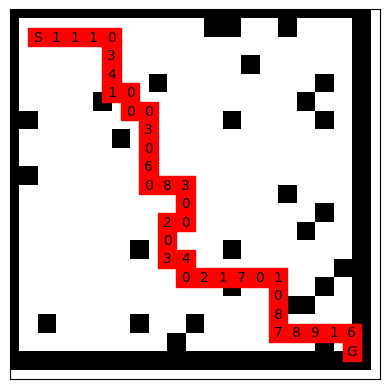

In [3]:
# let's print the maze and color the path
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.colors import LinearSegmentedColormap

def plot_maze(maze, path):
    rows, cols = len(maze), len(maze[0])
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.set_xlim(0, cols)
    ax.set_ylim(0, rows)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.invert_yaxis()
    cmap = LinearSegmentedColormap.from_list("cmap", ["black", "white"])
    ax.imshow([[0 if cell == "X" else 1 for cell in row] for row in maze], cmap=cmap)
    # show actual cost of path
    for i, (x, y) in enumerate(path):
        cost = maze[x][y]
        ax.text(y + 0.5, x + 0.5, cost, ha="center", va="center")
    for x, y in path:
        ax.add_patch(patches.Rectangle((y, x), 1, 1, color="red"))
    plt.show()

maze, start, goal = parse_maze("maze_20x20.txt")
path, _, _ = dijkstra(maze, start, goal)
plot_maze(maze, path)

In [6]:
# how long is the path?
print(f"Path is {len(path)} steps long")

Path is 37 steps long


In [13]:
solve_maze("maze6x6.txt")

Maze:
['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X']
['X', 'S', '1', '1', '9', '1', '1', 'X']
['X', '8', 'X', '9', '9', 'X', '1', 'X']
['X', '0', '0', 'X', '9', 'X', '1', 'X']
['X', '1', '2', '3', 'G', '1', '1', 'X']
['X', 'X', '0', '1', '1', 'X', 'X', 'X']
['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X']

Start: (1, 1)
Goal: (4, 4)
Path: (1,1) -> (2,1) -> (3,1) -> (3,2) -> (4,2) -> (5,2) -> (5,3) -> (5,4) -> (4,4)
Moves: Down -> Down -> Right -> Down -> Down -> Right -> Right -> Up
Total Cost: 12
Moves Explored 16


## Alternative approaches

*   We could try flooding from Source to Goal - this would find us A solution
*   We could do a full breadth first search
* We could try bi-direction approach meaning we search from Start and Goal at the same time and then when we meet we have the optimal (just need to look for edge cases)
* We could even use Bellman Ford for this



In [ ]:
from collections import defaultdict

def main():
    file_path = 'maze_20x20.txt'
    maze = []
    with open(file_path, 'r') as file:
        rows = file.readlines()
        for row in rows:
            temp = []
            for item in row.strip():  # Remove newline characters
                temp.append(item)
            maze.append(temp)

    graph, start, end = build_graph(maze)
    print(start)
    print(end)
    print(graph)
    print(find_shortest_path(graph, start, end))

# https://www.geeksforgeeks.org/generate-graph-using-dictionary-python/
def build_graph(maze):
    graph = defaultdict(list)
    start = None
    end = None

    def addEdge(graph, u, v):
        graph[u].append(v)

    rows = len(maze)
    cols = len(maze[0])

    for row_numb in range(rows):
        for column_numb in range(cols):
            cell = maze[row_numb][column_numb]
            if cell != "X":
                if cell == "S":
                    start = (row_numb, column_numb)
                elif cell == "G":
                    end = (row_numb, column_numb)

                # Check all four directions
                directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
                for dr, dc in directions:
                    new_row, new_col = row_numb + dr, column_numb + dc
                    if 0 <= new_row < rows and 0 <= new_col < cols:
                        if maze[new_row][new_col] != "X":
                            addEdge(graph, (row_numb, column_numb), (new_row, new_col))

    return graph, start, end


def find_shortest_path(graph, start, end, path =[]):
    path = path + [start]
    if start == end:
        return path
    shortest = None
    for node in graph[start]:
        if node not in path:
            newpath = find_shortest_path(graph, node, end, path)
            if newpath:
                if not shortest or len(newpath) < len(shortest):
                    shortest = newpath
                print(newpath)
    return shortest


main()

(1, 1)
(18, 18)
defaultdict(<class 'list'>, {(1, 1): [(2, 1), (1, 2)], (1, 2): [(2, 2), (1, 1), (1, 3)], (1, 3): [(2, 3), (1, 2), (1, 4)], (1, 4): [(2, 4), (1, 3), (1, 5)], (1, 5): [(2, 5), (1, 4), (1, 6)], (1, 6): [(2, 6), (1, 5), (1, 7)], (1, 7): [(2, 7), (1, 6), (1, 8)], (1, 8): [(2, 8), (1, 7), (1, 9)], (1, 9): [(2, 9), (1, 8), (1, 10)], (1, 10): [(2, 10), (1, 9)], (1, 13): [(2, 13), (1, 14)], (1, 14): [(2, 14), (1, 13)], (1, 16): [(2, 16), (1, 17)], (1, 17): [(2, 17), (1, 16), (1, 18)], (1, 18): [(2, 18), (1, 17)], (2, 1): [(1, 1), (3, 1), (2, 2)], (2, 2): [(1, 2), (3, 2), (2, 1), (2, 3)], (2, 3): [(1, 3), (3, 3), (2, 2), (2, 4)], (2, 4): [(1, 4), (3, 4), (2, 3), (2, 5)], (2, 5): [(1, 5), (3, 5), (2, 4), (2, 6)], (2, 6): [(1, 6), (3, 6), (2, 5), (2, 7)], (2, 7): [(1, 7), (3, 7), (2, 6), (2, 8)], (2, 8): [(1, 8), (3, 8), (2, 7), (2, 9)], (2, 9): [(1, 9), (3, 9), (2, 8), (2, 10)], (2, 10): [(1, 10), (3, 10), (2, 9), (2, 11)], (2, 11): [(3, 11), (2, 10), (2, 12)], (2, 12): [(3, 12), 

KeyboardInterrupt: 